<a href="https://colab.research.google.com/github/BRUNDHA-J/NLP/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np


In [ ]:
with open('/content/drive/MyDrive/train_qa.txt','rb')as f:
    train_data=pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/test_qa.txt','rb')as f:
    test_data=pickle.load(f)

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(train_data)

10000

In [ ]:
len(test_data)

1000

In [ ]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'

### set up a vocabulary of all the words inside a dataset

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')

In [ ]:
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab)+1

In [ ]:
vocab_len

38

In [ ]:
# Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [ ]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [ ]:
max_story_len = max(all_story_lens)

In [ ]:
max_story_len

156

In [ ]:
all_question_lens = [len(data[1]) for data in all_data]
max_question_len = max(all_question_lens)
max_question_len

6

## Vectorizing

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)


In [ ]:
tokenizer.word_index

{'.': 33,
 '?': 34,
 'apple': 23,
 'back': 35,
 'bathroom': 29,
 'bedroom': 12,
 'daniel': 24,
 'discarded': 17,
 'down': 7,
 'dropped': 36,
 'football': 1,
 'garden': 26,
 'got': 5,
 'grabbed': 28,
 'hallway': 16,
 'in': 32,
 'is': 37,
 'john': 19,
 'journeyed': 30,
 'kitchen': 3,
 'left': 25,
 'mary': 20,
 'milk': 9,
 'moved': 21,
 'no': 8,
 'office': 18,
 'picked': 15,
 'put': 31,
 'sandra': 4,
 'the': 13,
 'there': 14,
 'to': 2,
 'took': 10,
 'travelled': 11,
 'up': 6,
 'went': 22,
 'yes': 27}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

In [ ]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [ ]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [ ]:
train_question_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [ ]:
train_answers

['no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',


In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [ ]:
len(train_story_text)

10000

In [ ]:
train_story_seq

[[20, 21, 2, 13, 29, 33, 4, 30, 2, 13, 12, 33],
 [20,
  21,
  2,
  13,
  29,
  33,
  4,
  30,
  2,
  13,
  12,
  33,
  20,
  22,
  35,
  2,
  13,
  12,
  33,
  24,
  22,
  35,
  2,
  13,
  16,
  33],
 [20,
  21,
  2,
  13,
  29,
  33,
  4,
  30,
  2,
  13,
  12,
  33,
  20,
  22,
  35,
  2,
  13,
  12,
  33,
  24,
  22,
  35,
  2,
  13,
  16,
  33,
  4,
  22,
  2,
  13,
  3,
  33,
  24,
  22,
  35,
  2,
  13,
  29,
  33],
 [20,
  21,
  2,
  13,
  29,
  33,
  4,
  30,
  2,
  13,
  12,
  33,
  20,
  22,
  35,
  2,
  13,
  12,
  33,
  24,
  22,
  35,
  2,
  13,
  16,
  33,
  4,
  22,
  2,
  13,
  3,
  33,
  24,
  22,
  35,
  2,
  13,
  29,
  33,
  24,
  15,
  6,
  13,
  1,
  14,
  33,
  24,
  22,
  2,
  13,
  12,
  33],
 [20,
  21,
  2,
  13,
  29,
  33,
  4,
  30,
  2,
  13,
  12,
  33,
  20,
  22,
  35,
  2,
  13,
  12,
  33,
  24,
  22,
  35,
  2,
  13,
  16,
  33,
  4,
  22,
  2,
  13,
  3,
  33,
  24,
  22,
  35,
  2,
  13,
  29,
  33,
  24,
  15,
  6,
  13,
  1,
  14,
  33,
  24,
  

In [ ]:
def vectorize_stories(data,word_index = tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):

  # Stories =X
  X = []
  # Questions Xq
  Xq = []
  # Y correct answer(yes/no)
  Y = []

  for story,query,answer in data:
    #for each story
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    y = np.zeros(len(word_index)+1)

    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))



In [ ]:
inputs_train, queries_train, answer_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answer_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 13, 12, 33],
       [ 0,  0,  0, ..., 13, 26, 33],
       [ 0,  0,  0, ..., 13, 26, 33],
       ...,
       [ 0,  0,  0, ..., 13, 23, 33],
       [ 0,  0,  0, ..., 13, 26, 33],
       [ 0,  0,  0, ..., 23, 14, 33]], dtype=int32)

In [ ]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

27

In [ ]:
tokenizer.word_index['no']

8

In [ ]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

## Build Neural Network
#### Input Encoder M
#### Input Encoder C
#### Question Encoder

In [ ]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM
import tensorflow as tf


In [ ]:
#accessing gpu
tf.debugging.set_log_device_placement(True)

In [ ]:
# PLACEHOLDER shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
# vocab_len
vocab_size = len(vocab) + 1

In [ ]:
# Input Encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

#(samples,story_maxlen,embedding_dim)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
# Input Encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#(samples,story_maxlen,max_question_len)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
# question Encoder M
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,query_maxlen,embedding_dim)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
# Encoded <-----Encoder(Input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [ ]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response,question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples,vocab_size) # yes/no
answer = Activation('softmax')(answer)


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Qr in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DiagPart in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sign in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing o

In [ ]:
model = Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

## Fit and Train the Model

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit([inputs_train,queries_train],answer_train,batch_size=32,epochs=150,validation_data=([inputs_test,queries_test],answer_test))

Streaming output truncated to the last 5000 lines.
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/313 [==>...........................] - ETA: 3s - loss: 0.2255 - accuracy: 0.9081Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_113344 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/313 [===>..........................] - ETA: 3s - loss: 0.2248 - accuracy: 0.9087Executing op __inference_train_function_113344 in device /job:local

In [ ]:
import pandas as pd
result=pd.DataFrame(history.history)
display(result)

,loss,accuracy,val_loss,val_accuracy
0,0.949288,0.4951,0.695681,0.503
1,0.707269,0.5019,0.697651,0.497
2,0.696165,0.5113,0.693462,0.503
3,0.695782,0.4997,0.693696,0.497
4,0.694082,0.5084,0.696091,0.497
...,...,...,...,...
145,0.233392,0.9006,0.624665,0.808
146,0.224014,0.9089,0.586464,0.808
147,0.231990,0.9064,0.605492,0.807
148,0.226238,0.9070,0.591401,0.804


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


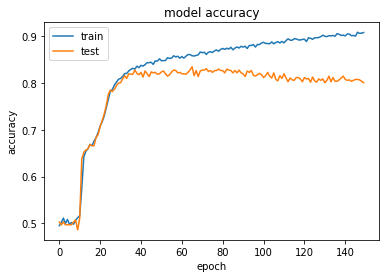

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/datasets/chat_bot.h5')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
pred_results = model.predict(([inputs_test,queries_test]))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
pred_results

array([[9.6337347e-09, 9.5075610e-09, 9.5732142e-09, ..., 9.9984483e-09,
        9.5675192e-09, 8.9525392e-09],
       [3.7918668e-09, 3.8162380e-09, 4.0360435e-09, ..., 4.0601407e-09,
        4.0289523e-09, 3.8319925e-09],
       [1.3086887e-10, 1.3415900e-10, 1.3237868e-10, ..., 1.5040405e-10,
        1.3196574e-10, 1.2945527e-10],
       ...,
       [3.2133647e-18, 3.9495823e-18, 3.6574796e-18, ..., 3.9323538e-18,
        3.7587683e-18, 4.9610343e-18],
       [2.8161361e-19, 3.7704916e-19, 2.9473027e-19, ..., 2.8986110e-19,
        3.0658790e-19, 3.6415019e-19],
       [1.3281331e-17, 1.5919640e-17, 1.3523973e-17, ..., 1.2425644e-17,
        1.2578204e-17, 1.4396963e-17]], dtype=float32)

In [ ]:
pred_results.shape

(1000, 38)

In [ ]:
pred_results[0]

array([9.6337347e-09, 9.5075610e-09, 9.5732142e-09, 9.2384154e-09,
       9.4601678e-09, 9.3233119e-09, 8.7735899e-09, 9.0416359e-09,
       9.8357069e-01, 9.2416581e-09, 9.3091677e-09, 9.3181214e-09,
       9.4704946e-09, 9.3376205e-09, 9.4789527e-09, 1.0041028e-08,
       9.7745501e-09, 1.0175252e-08, 8.9106651e-09, 9.5978967e-09,
       9.1994847e-09, 9.5750412e-09, 9.5242951e-09, 9.2937329e-09,
       9.1529282e-09, 9.2957189e-09, 8.9939576e-09, 1.6429037e-02,
       1.0042483e-08, 1.0414723e-08, 9.4708197e-09, 1.0310326e-08,
       9.5261479e-09, 9.0450865e-09, 9.6522008e-09, 9.9984483e-09,
       9.5675192e-09, 8.9525392e-09], dtype=float32)

In [ ]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [ ]:
test_data[0][2]

'no'

In [ ]:
val_max = np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'no'

In [ ]:
pred_results[0][val_max]

0.9835707

In [ ]:
## Create our own stories, questions within the vocab

In [ ]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [ ]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [ ]:
my_question = "Is the football in the garden ?"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
my_sto ,my_que ,my_ans = vectorize_stories(mydata)

In [ ]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [ ]:
pred_results = model.predict(([my_sto,my_que]))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'yes'